In [4]:
import src.BuildModel
import psycopg2 as pg2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import pickle
from datetime import datetime
import importlib


In [5]:
conn = pg2.connect(user='postgres',  dbname='penny', host='localhost', port='5432', password='')
df = pd.read_sql ("""Select * from auction_full """, conn)


print ("3. Splitting into Train/Test Sets")
y = df['is_winner']
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y)#, random_state=0) 

3. Splitting into Train/Test Sets


In [8]:
importlib.reload(src.BuildModel)
from src.BuildModel import PennyModel
pm = PennyModel()
pm.fit(X_train, y_train)

2. Transforming data
4. Fitting model


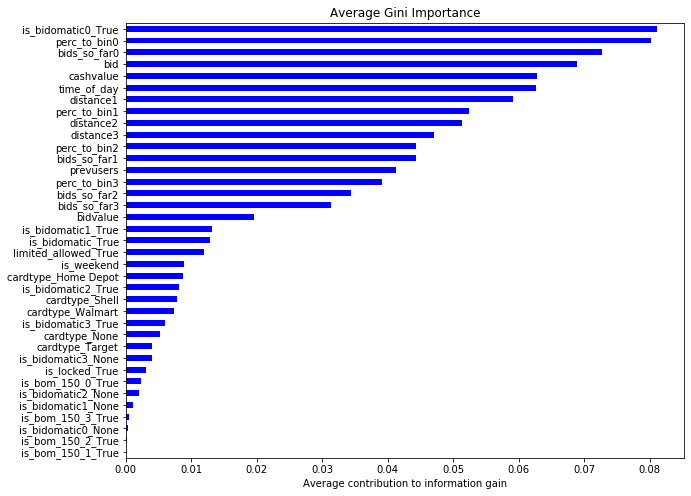

In [9]:
# Plot the feature importance
feat_scores = pm.get_feature_scores()
feat_scores = feat_scores.sort_values()
fig, ax = plt.subplots()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');


In [10]:
#X_bids = X_test[X_test.cashvalue==33]
#y_bids = y_test[X_test.cashvalue==33]
probs = pm.predict_proba(X_test)[:,1]
threshes = np.unique(probs)
threshes = threshes[threshes > .4]

2. Transforming data


In [11]:
def print_profit_threshold (y_test, probs, X_test):
    for thresh in threshes:
        y_pred = probs >= thresh
        cm = confusion_matrix(y_test, y_pred)
        print("*****************************")
        print("thresh:", thresh)
        print ("Accuracy {}: Precision: {}  Recall:{} ".format(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
        print(cm)
        true_positive_mask = (y_pred==True)&(y_test==True)
        profit = sum(X_test.cashvalue[true_positive_mask])-sum(y_pred)*.40 - sum(X_test.fee[true_positive_mask]) - sum(X_test.bid[true_positive_mask])/100
        profit_per_bid = profit/sum(y_pred)
        print("profit:", profit)
        print("profit per bid:", profit_per_bid)
        print("*****************************")
        print("")

    

In [12]:

print_profit_threshold(y_test, probs, X_test)

*****************************
thresh: 0.405
Accuracy 0.5816925602812634: Precision: 0.006513383045132024  Recall:0.8461538461538461 
[[137172  98992]
 [   118    649]]
profit: -10870.760000000004
profit per bid: -0.10909926636625489
*****************************

*****************************
thresh: 0.41
Accuracy 0.5894247692366132: Precision: 0.006605114362545116  Recall:0.8422425032594524 
[[139007  97157]
 [   121    646]]
profit: -10377.460000000006
profit per bid: -0.1061057431776122
*****************************

*****************************
thresh: 0.415
Accuracy 0.5971949639346477: Precision: 0.006690705963274069  Recall:0.8370273794002607 
[[140852  95312]
 [   125    642]]
profit: -9893.73
profit per bid: -0.10310909394084665
*****************************

*****************************
thresh: 0.42
Accuracy 0.6049482760803778: Precision: 0.006789854533476427  Recall:0.833116036505867 
[[142692  93472]
 [   128    639]]
profit: -9431.390000000003
profit per bid: -0.100215596

profit: 1331.5699999999963
profit per bid: 0.026618623060930678
*****************************

*****************************
thresh: 0.565
Accuracy 0.7952610675681949: Precision: 0.010479041916167664  Recall:0.666232073011734 
[[187911  48253]
 [   256    511]]
profit: 1728.0599999999968
profit per bid: 0.0354372077762283
*****************************

*****************************
thresh: 0.57
Accuracy 0.8005115413348189: Precision: 0.01060918620805793  Recall:0.6571056062581486 
[[189162  47002]
 [   263    504]]
profit: 1919.729999999997
profit per bid: 0.040410263966656784
*****************************

*****************************
thresh: 0.575
Accuracy 0.8058379865868122: Precision: 0.010750594851827817  Recall:0.6479791395045632 
[[190431  45733]
 [   270    497]]
profit: 2138.6899999999987
profit per bid: 0.04626195111399521
*****************************

*****************************
thresh: 0.58
Accuracy 0.8107972363261878: Precision: 0.010900694891548076  Recall:0.640156453

Accuracy 0.9239525431454727: Precision: 0.016318062019850837  Recall:0.379400260756193 
[[218622  17542]
 [   476    291]]
profit: 3448.489999999999
profit per bid: 0.19337688554926255
*****************************

*****************************
thresh: 0.725
Accuracy 0.9268901072464135: Precision: 0.016585878642761197  Recall:0.37027379400260757 
[[219325  16839]
 [   483    284]]
profit: 3440.1699999999987
profit per bid: 0.20090930327629497
*****************************

*****************************
thresh: 0.73
Accuracy 0.9297221553954527: Precision: 0.016909975669099755  Recall:0.3624511082138201 
[[220002  16162]
 [   489    278]]
profit: 3496.7999999999997
profit per bid: 0.21270072992700728
*****************************

*****************************
thresh: 0.735
Accuracy 0.9325542035444918: Precision: 0.017200888606791493  Recall:0.3533246414602347 
[[220680  15484]
 [   496    271]]
profit: 3447.3599999999997
profit per bid: 0.21881053633767056
*****************************

Accuracy 0.986025467330151: Precision: 0.027137546468401486  Recall:0.09517601043024772 
[[233547   2617]
 [   694     73]]
profit: 1423.99
profit per bid: 0.529364312267658
*****************************

*****************************
thresh: 0.885
Accuracy 0.9870088760018739: Precision: 0.028944150020383204  Recall:0.09256844850065189 
[[233782   2382]
 [   696     71]]
profit: 1423.38
profit per bid: 0.5802609050142683
*****************************

*****************************
thresh: 0.89
Accuracy 0.9878234591505544: Precision: 0.02975133214920071  Recall:0.08735332464146023 
[[233979   2185]
 [   700     67]]
profit: 1294.8
profit per bid: 0.574955595026643
*****************************

*****************************
thresh: 0.895
Accuracy 0.988583174004246: Precision: 0.031431334622823985  Recall:0.0847457627118644 
[[234161   2003]
 [   702     65]]
profit: 1248.8799999999999
profit per bid: 0.603907156673114
*****************************

*****************************
thresh: 

In [13]:
X_t = pm.transform(X_test)

2. Transforming data


In [14]:
probs = pm.predict_proba(X_t)[:,1]
tobiddf = X_t[ probs > .55]


2. Transforming data


In [15]:
tobiddf.groupby("cashvalue").mean()

,auctionid,is_winner,cardvalue,fee,bidvalue,limited_allowed,is_locked,bid,is_bidomatic,bids_so_far,...,bids_so_far3,bom_bids_so_far3,bom_streak3,perc_to_bin3,time_of_day,is_weekend,is_bom_150_0,is_bom_150_1,is_bom_150_2,is_bom_150_3
cashvalue,,,,,,,,,,,,,,,,,,,,,
6,5.652196e+08,0.028637,0.0,0.00,15.0,0.577320,0.016037,36.655212,0.344788,10.296678,...,5.241477,2.204545,1.110795,0.349432,863.650630,0.360825,0.000000,0.000000,0.000000,0.000000
10,5.687659e+08,0.021953,0.0,0.00,25.0,0.629826,0.012869,63.489780,0.392884,18.012869,...,9.997187,3.355837,2.143460,0.399887,916.809992,0.508706,0.000000,0.000000,0.000000,0.000000
20,5.701757e+08,0.010660,0.0,0.00,50.0,0.445264,0.035260,130.015990,0.395244,35.050841,...,16.814153,8.311508,3.639550,0.336283,921.391144,0.438704,0.000000,0.000000,0.000000,0.000000
33,5.749600e+08,0.010139,25.0,1.00,20.0,0.192836,0.015256,168.816166,0.743391,35.661329,...,25.448056,19.963194,13.541389,0.308461,819.542405,0.170378,0.000190,0.000000,0.000000,0.000000
37,5.593374e+08,0.012261,25.0,1.00,30.0,0.200860,0.008469,158.123373,0.757174,36.707496,...,20.884128,14.767049,9.671092,0.225774,754.970800,0.156870,0.000126,0.000632,0.000000,0.000379
40,5.965727e+08,0.009655,0.0,0.00,100.0,0.000000,0.028221,215.838841,0.760119,49.409580,...,26.646512,17.418088,8.127132,0.266465,865.200149,0.204233,0.000371,0.000000,0.001857,0.000371
50,5.542480e+08,0.008677,50.0,1.99,0.0,0.210412,0.000000,128.821041,0.401302,38.393709,...,17.322353,11.861176,1.783529,0.138579,971.138829,0.097614,0.000000,0.000000,0.002169,0.000000
58,5.589319e+08,0.007242,50.0,1.99,20.0,0.183509,0.157834,397.400757,0.865372,68.550527,...,43.301241,37.760163,23.767009,0.298629,898.082620,0.325214,0.000823,0.000494,0.004773,0.002962
62,5.055341e+08,0.009474,50.0,1.99,30.0,0.182617,0.147055,366.134423,0.858575,66.652753,...,35.434023,27.301500,16.574141,0.228607,887.176850,0.151723,0.001098,0.002883,0.002060,0.007003


In [101]:
import pyshark
packets_array = []

def counter(*args):
 packets_array.append(args[0])

def count_packets():
    cap = pyshark.FileCapture('http.cap', keep_packets=False)
    cap.apply_on_packets(counter, timeout=10000)
    return len(packets_array)

print("Packets number:"+str(count_packets()))

for packet in packets_array:
   print(packet)

FileNotFoundError: [Errno 2] No such file or directory: http.cap

In [99]:
pm.pickle("model2020-02-16.pkl")

5. Pickling model as penny_auction.pickle


In [2]:
pm = pickle.load(open( "model2020-02-16.pkl", "rb" ))

In [27]:
jsonX = {
    "auctionid": [3],
    "is_winner": [False],
    "cardtype": ["Amazon"],
    "cashvalue": [162],
    "cardvalue": [150],
    "fee": [1.99],
    "bidvalue": [30],
    "limited_allowed": [True],
    "is_locked": [False],
    "auctiontime": datetime.strptime('2020-01-16 18:16:52', '%Y-%m-%d %H:%M:%S'),
    "bid": [638],
    "is_bidomatic": [False],
    "bids_so_far": [164],
    "username": ["Tareee"],
    "prevusers":                            [18],
    "username0":                       ["16ArkIe"],
    "distance0":                             [1],
    "is_bidomatic0":                      [True],
    "bids_so_far0":                        [102],
    "bom_bids_so_far0":                     [82],
    "bom_streak0":                          [23],
    "perc_to_bin0":                   [0.251852],
    "prev_win_bids0":                        [0],
    "username1":                 ["vincentsamuel"],
    "distance1":                             [7],
    "is_bidomatic1":                      [True],
    "bids_so_far1":                        [238],
    "bom_bids_so_far1":                    [236],
    "bom_streak1":                         [236],
    "perc_to_bin1":                   [0.587654],
    "prev_win_bids1":                        [0],
    "username2":                     ["njliquori"],
    "distance2":                            [66],
    "is_bidomatic2":                     [False],
    "bids_so_far2":                         [96],
    "bom_bids_so_far2":                     [89],
    "bom_streak2":                           [0],
    "perc_to_bin2":                   [0.237037],
    "prev_win_bids2":                        [0],
    "username3":                      ["atwoodel"],
    "distance3":                           [137],
    "is_bidomatic3":                      [True],
    "bids_so_far3":                          [1],
    "bom_bids_so_far3":                      [1],
    "bom_streak3":                           [1],
    "perc_to_bin3":                 [0.00246914],
    "prev_win_bids3":                        [0]
}

In [28]:
pm.predict_proba_from_json(jsonX)

2. Transforming data


array([[1., 0.]])

In [41]:
np.unique(pm.predict_proba(X_test)[:, 1], return_counts=True)

2. Transforming data


(array([0.        , 0.03333333, 0.08333333, 0.1       , 0.11666667,
        0.2       , 0.3       , 0.4       , 0.43166667, 0.5       ,
        0.6       , 0.7       , 0.8       , 1.        ]),
 array([230391,      2,      1,   5430,      1,    668,    234,     95,
             1,     61,     28,     14,      4,      1]))

In [34]:
pm.predict_proba(X_test.iloc[0:10,:])

2. Transforming data


array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [30]:
X

auctionid                             3
is_winner                         False
cardtype                         Amazon
cashvalue                           162
cardvalue                           150
fee                                1.99
bidvalue                             30
limited_allowed                    True
is_locked                         False
auctiontime         2020-01-16 18:16:52
bid                                 638
is_bidomatic                      False
bids_so_far                         164
username                         Tareee
prevusers                            18
username0                       16ArkIe
distance0                             1
is_bidomatic0                      True
bids_so_far0                        102
bom_bids_so_far0                     82
bom_streak0                          23
perc_to_bin0                   0.251852
prev_win_bids0                        0
username1                 vincentsamuel
distance1                             7


In [19]:
bozo

,0
auctionid,3
is_winner,False
cardtype,Amazon
cashvalue,162
cardvalue,150
fee,1.99
bidvalue,30
limited_allowed,True
is_locked,False
auctiontime,2020-01-16 18:16:52


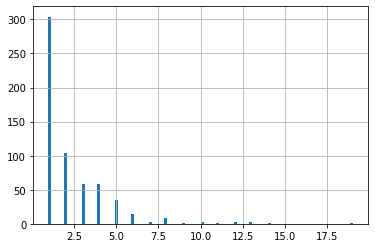

In [60]:
X_test[probs > .9]["bids_so_far0"].hist(bins=100)

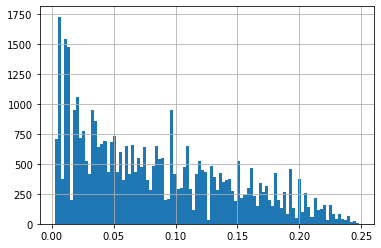

In [62]:
X_test["perc_to_bin0"].hist(bins=100)